### DEMAPP03 
# Basis functions and standard nodes for major approximation schemes

### Set degree of approximation and approximation interval

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, BasisSpline, demo 

figures = []

In [2]:
n, a, b = 9, 0, 1

###  Routine for plotting basis functions

In [3]:
def basisplot(x,Phi,figtitle):
    fig = plt.figure(figsize=[6,6])
    ymin = np.round(Phi.min())
    ymax = np.round(Phi.max())
    for j, phi in enumerate(Phi):
        demo.subplot(3,3,j+1,'','','',[0,1],[ymin,ymax])
        plt.plot(x,phi,lw=4)
        plt.xticks([0, 1] if j//3 == 2 else [])
        plt.yticks([] if j%3 else [ymin, ymax])
        plt.title(figtitle if j==1 else '')
    
    figures.append(fig)

###  Routine for plotting approximation nodes

In [4]:
def nodeplot(xnode,figtitle):
    fig = demo.figure(figtitle,'', '',[-0.0001, 1.0001], [-0.05, 0.05],figsize=[6,1.5])
    plt.plot(xnode, np.zeros_like(xnode),'bo',ms=8)
    plt.xticks([0,1])
    plt.yticks([])
    
    figures.append(fig)

### % Construct plotting grid

In [5]:
m = 1001
x = np.linspace(a, b, m)

### % Plot monomial basis functions

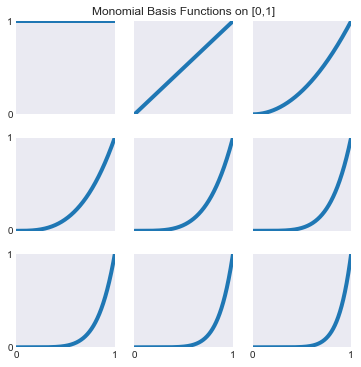

In [6]:
Phi = np.array([x ** j for j in np.arange(n)])
basisplot(x,Phi,'Monomial Basis Functions on [0,1]')

### % Plot Chebychev basis functions and nodes

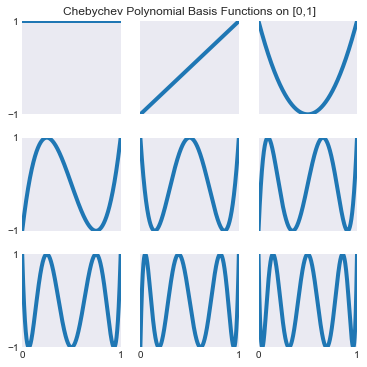

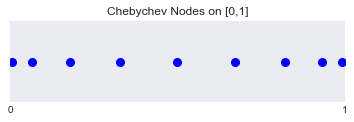

In [7]:
B = BasisChebyshev(n,a,b)
basisplot(x, B.Phi(x).T,'Chebychev Polynomial Basis Functions on [0,1]')
nodeplot(B.nodes,'Chebychev Nodes on [0,1]')

### % Plot linear spline basis functions and nodes

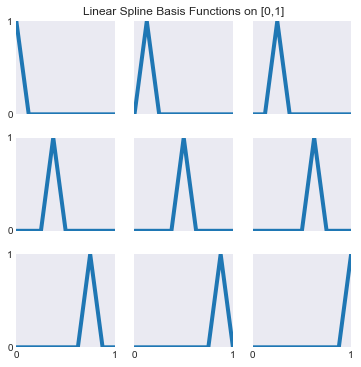

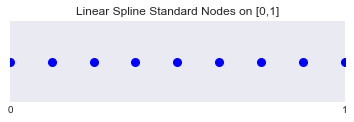

In [8]:
L = BasisSpline(n,a,b,k=1)
basisplot(x, L.Phi(x).T.toarray(),'Linear Spline Basis Functions on [0,1]')
nodeplot(L.nodes,'Linear Spline Standard Nodes on [0,1]')

### % Plot cubic spline basis functions and nodes

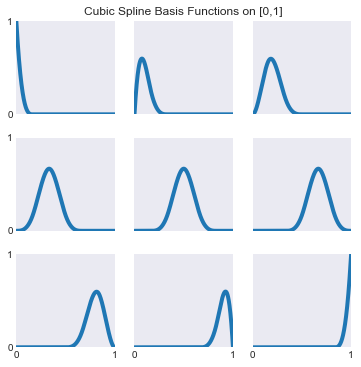

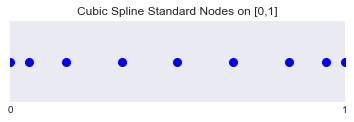

In [9]:
C = BasisSpline(n,a,b,k=3)
basisplot(x, C.Phi(x).T.toarray(),'Cubic Spline Basis Functions on [0,1]')
nodeplot(C.nodes,'Cubic Spline Standard Nodes on [0,1]')

In [10]:
#demo.savefig(figures)